## Load MNIST on Python 3.x

In [1]:
import pickle
import gzip
import numpy as np

In [125]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, testing_data = pickle.load(f, encoding='latin1')

train_data=np.array(training_data[0])
train_target=np.array(training_data[1])
valid_data=np.array(validation_data[0])
valid_target=np.array(validation_data[1])
test_data=np.array(testing_data[0])
test_target=np.array(testing_data[1])

print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

print(train_target.shape)
print(valid_target.shape)
print(test_target.shape)
f.close()

(50000, 784)
(10000, 784)
(10000, 784)
(50000,)
(10000,)
(10000,)


## Load USPS on Python 3.x

In [28]:
from PIL import Image
import os


In [154]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
print(np.array(USPSMat).shape)
print(np.array(USPSTar).shape)
USPS_data=np.array(USPSMat)
USPS_Target=np.array(USPSTar)

(19999, 784)
(19999,)


In [174]:
#Softmax function

def softmax(x):
    #print(x.shape)
    x -= np.max(x)
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [175]:
#One Hot Encoding
import scipy.sparse
def oneHotEncoding(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    oneHot = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    oneHot = np.array(oneHot.todense()).T
    return oneHot

In [176]:
oneHotTestTarget=oneHotEncoding(test_target)
oneHotValidTarget=oneHotEncoding(valid_target)
oneHotTrainTarget=oneHotEncoding(train_target)
print(oneHotTrainTarget.shape)
print(oneHotValidTarget.shape)
print(oneHotTestTarget.shape)
print(train_data.shape[0])

(50000, 10)
(10000, 10)
(10000, 10)
50000


In [177]:

def getGradientandLoss(w,x,y,lamda,bias):
    m = x.shape[0] # number of training examples
    y_mat = oneHotEncoding(y) #integer class coding into a one-hot representation
    z = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    
    #print(z[10000])
    
    prob = softmax(z+bias) #perform a softmax to get their probabilities
    
    #print(prob.shape)
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lamda/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lamda*w #compute the gradient for that loss
    return loss,grad

In [189]:
def getProbsAndPreds(data):
    probs = softmax(np.dot(data,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

print(train_data.shape[1])
print(len(np.unique(train_target)))

784
10


In [183]:
w = np.zeros([train_data.shape[1],len(np.unique(train_target))])
b = np.zeros([train_data.shape[0],len(np.unique(train_target))])
lamda = 10
iterations = 300
learningRate = 1e-4
losses = []
for i in range(0,iterations):
    loss,grad = getGradientandLoss(w,train_data,train_target,lamda,b)
    losses.append(loss)
    w = w - (learningRate * grad)
    
print(loss)

10.807741968801144


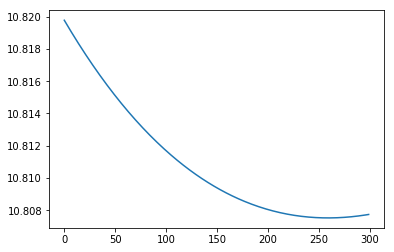

In [184]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [227]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def getAccuracy(data,target):
    prob,prede = getProbsAndPreds(data)
    print ('---------- Confusion Matrix--------------------')
    print(confusion_matrix(target, prede))
    
    accuracy = accuracy_score(target, prede)
    return accuracy

In [228]:
print ('----------Softmax Logistic Regression --------------------')
print ('----------Stochastic Gradient Descent --------------------')
print ('UBITname      = APURBAMA')
print ('Person Number = 50288705')
print("Training Accuracy "+ str(getAccuracy(train_data,train_target)*100))
print("Validation Accuracy "+ str(getAccuracy(valid_data,valid_target)*100))
print("Testing MNIST Accuracy "+ str(getAccuracy(test_data,test_target)*100))
print("Testing USPS Accuracy "+ str(getAccuracy(USPS_data,USPS_Target)*100))

----------Softmax Logistic Regression --------------------
----------Stochastic Gradient Descent --------------------
UBITname      = APURBAMA
Person Number = 50288705
---------- Confusion Matrix--------------------
[[4738   16   14   25    7   16   93    7   10    6]
 [   0 5618   16    9    2    7   12    8    3    3]
 [ 318  725 3287  124  119    2  187  132   66    8]
 [ 221  447  112 3903   15   72   58  123   86   64]
 [  68  294   15    0 3996    2  127   74   10  273]
 [ 878  831    6  989  134 1190  148  148   66  116]
 [ 298  346   45    8   51   17 4181    2    3    0]
 [ 107  450   41    4   79    4    4 4419    7   60]
 [ 234 1128   62  633   67   23   85   79 2386  145]
 [ 178  413   17   95  602    8    8  779   21 2867]]
Training Accuracy 73.17
---------- Confusion Matrix--------------------
[[ 944    5    3    6    0    2   21    5    5    0]
 [   0 1056    1    1    0    3    0    2    0    1]
 [  53  121  717   24   22    0   18   20   14    1]
 [  38   70   22  843 